In [2]:
%reload_ext autoreload

In [3]:
import pandas as pd
import os

In [4]:
os.chdir("..")

In [5]:
os.getcwd()

'c:\\Users\\user\\Downloads\\ten_academy\\week8\\Causal_Inference'

In [6]:
# Load the driver locations during request dataset
driver_locations = pd.read_csv('data/driver_locations_during_request.csv')
completed_features = pd.read_csv('data/complete_orders_features_engineered.csv')

In [8]:
len(driver_locations)

1557740

In [9]:
len(completed_features)

505323

In [10]:
completed_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505323 entries, 0 to 505322
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Trip ID                       505323 non-null  int64  
 1   Trip Start Time               505323 non-null  object 
 2   Trip End Time                 505323 non-null  object 
 3   Trip Duration(minutes)        505323 non-null  float64
 4   Day of Week                   505323 non-null  int64  
 5   Hour of Day                   505323 non-null  int64  
 6   Origin Lat                    505323 non-null  float64
 7   Origin Lon                    505323 non-null  float64
 8   Destination Lat               505323 non-null  float64
 9   Destination Lon               505323 non-null  float64
 10  Trip Distance (km)            505323 non-null  float64
 11  Average Temperature(Celcius)  505323 non-null  float64
 12  Wind Speed(km/h)              505323 non-nul

In [11]:
driver_locations.nunique()

id               1557740
order_id           26492
driver_id           1213
driver_action          2
lat               194406
lng               170385
created_at             0
updated_at             0
dtype: int64

In [12]:
driver_locations.rename(columns={'lat': 'Driver Lat', 'lng': 'Driver Lon', 'driver_action': 'Driver Action', 'driver_id': 'Driver ID'}, inplace=True)

In [13]:
driver_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   Driver ID      1557740 non-null  int64  
 3   Driver Action  1557740 non-null  object 
 4   Driver Lat     1557740 non-null  float64
 5   Driver Lon     1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [14]:
driver_locations.isna().sum()

id                     0
order_id               0
Driver ID              0
Driver Action          0
Driver Lat             0
Driver Lon             0
created_at       1557740
updated_at       1557740
dtype: int64

In [15]:
# Drop columns with all missing values
driver_locations_cleaned = driver_locations.drop(columns=['created_at', 'updated_at'])

In [16]:
driver_locations_cleaned.isna().sum()

id               0
order_id         0
Driver ID        0
Driver Action    0
Driver Lat       0
Driver Lon       0
dtype: int64

In [17]:
driver_locations.shape, completed_features.shape

((1557740, 8), (505323, 26))

In [18]:
# Display basic information and first few rows of the cleaned dataset
driver_locations_cleaned_info = driver_locations_cleaned.info()
driver_locations_cleaned_head = driver_locations_cleaned.head()

driver_locations_cleaned_info, driver_locations_cleaned_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   Driver ID      1557740 non-null  int64  
 3   Driver Action  1557740 non-null  object 
 4   Driver Lat     1557740 non-null  float64
 5   Driver Lon     1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


(None,
    id  order_id  Driver ID Driver Action  Driver Lat  Driver Lon
 0   1    392001     243828      accepted    6.602207    3.270465
 1   2    392001     243588      rejected    6.592097    3.287445
 2   3    392001     243830      rejected    6.596133    3.281784
 3   4    392001     243539      rejected    6.596142    3.280526
 4   5    392001     171653      rejected    6.609232    3.288800)

In [8]:
from utils.prepare_data import DataPreparation

prepares = DataPreparation()

In [20]:
driver_locations_cleaned.head(
    3
)

,id,order_id,Driver ID,Driver Action,Driver Lat,Driver Lon
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784


In [21]:
len(driver_locations_cleaned)

1557740

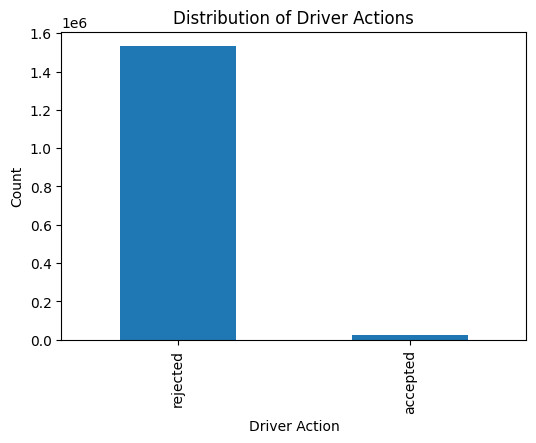

In [22]:
import matplotlib.pyplot as plt

# Plot the distribution of driver actions
plt.figure(figsize=(6, 4))
driver_locations_cleaned['Driver Action'].value_counts().plot(kind='bar')
plt.xlabel('Driver Action')
plt.ylabel('Count')
plt.title('Distribution of Driver Actions')
plt.show()


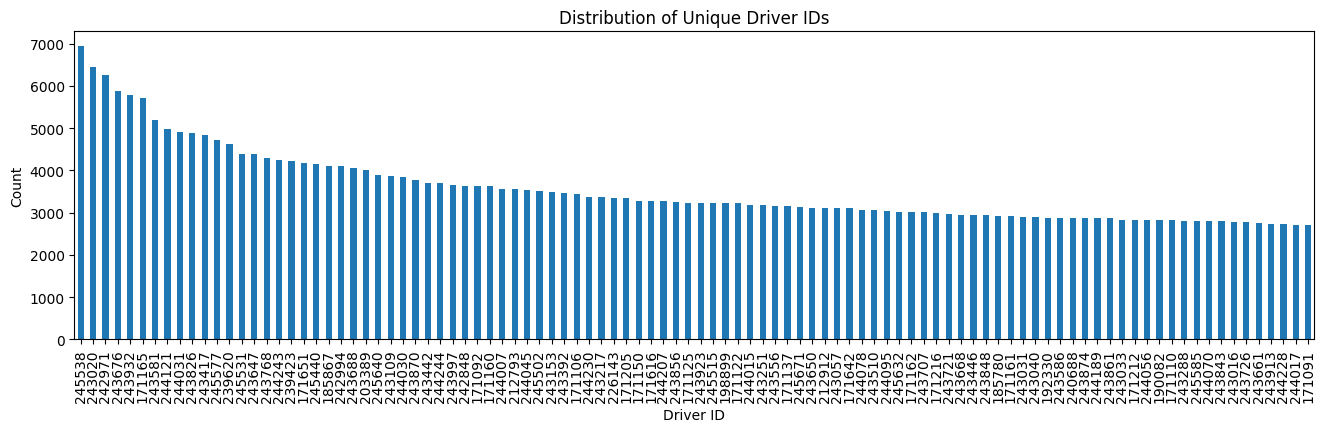

In [23]:
# plot unique driver ids
plt.figure(figsize=(16, 4))
driver_locations_cleaned['Driver ID'].value_counts().head(100).plot(kind='bar')
plt.xlabel('Driver ID')
plt.ylabel('Count')
plt.title('Distribution of Unique Driver IDs')
plt.show()

In [24]:
#get the number of times a driver has been accepted or rejected by unique drivers id

driver_locations_cleaned.groupby('Driver ID')[['Driver Action',]].value_counts()

Driver ID  Driver Action
121981     rejected         2133
           accepted           16
171091     rejected         2696
           accepted           19
171092     rejected         3619
                            ... 
247709     rejected            2
247794     rejected            1
247831     rejected           21
247877     accepted            1
           rejected            1
Name: count, Length: 2365, dtype: int64

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame for driver locations
geometry = [Point(xy) for xy in zip(driver_locations_cleaned['lng'], driver_locations_cleaned['lat'])]
gdf = gpd.GeoDataFrame(driver_locations_cleaned, geometry=geometry)

# Plot the driver locations on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'Nigeria'].plot(figsize=(10, 6), color='white', edgecolor='black')

# Plot driver locations
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Driver Locations in Lagos, Nigeria')
plt.show()


In [ ]:
import folium

# Create a map centered around Lagos
m = folium.Map(location=[6.5244, 3.3792], zoom_start=12)

# Add points to the map
for idx, row in driver_locations_cleaned.iterrows():
    folium.CircleMarker(location=[row['lat'], row['lng']], radius=1, color='blue').add_to(m)

# Display the map
m


In [ ]:
# Load the completed orders dataset
completed_orders = pd.read_csv('data/nb.csv')

# Clean and preprocess completed orders data
completed_orders_cleaned = completed_orders.dropna(subset=['Trip Start Time', 'Trip End Time'])
completed_orders_cleaned['Trip Start Time'] = pd.to_datetime(completed_orders_cleaned['Trip Start Time'])
completed_orders_cleaned['Trip End Time'] = pd.to_datetime(completed_orders_cleaned['Trip End Time'])
completed_orders_cleaned[['Origin Lat', 'Origin Lon']] = completed_orders_cleaned['Trip Origin'].str.split(',', expand=True).astype(float)
completed_orders_cleaned[['Destination Lat', 'Destination Lon']] = completed_orders_cleaned['Trip Destination'].str.split(',', expand=True).astype(float)

# Merge driver locations with completed orders on 'order_id'
merged_data = pd.merge(driver_locations_cleaned, completed_orders_cleaned, left_on='order_id', right_on='Trip ID', how='inner')

# Calculate distance between driver location and order origin
merged_data['Driver to Origin Distance (km)'] = prepares.haversine_distance(
    merged_data['lat'], merged_data['lng'],
    merged_data['Origin Lat'], merged_data['Origin Lon']
)

# Display the first few rows of the merged data
merged_data_head = merged_data[['order_id', 'driver_id', 'Driver to Origin Distance (km)', 'Origin Lat', 'Origin Lon', 'lat', 'lng']].head()
merged_data_head


In [ ]:
driver_locations_cleaned, completed_features

In [25]:
# Merge driver locations with completed orders on 'order_id'
merged_data = pd.merge(driver_locations_cleaned, completed_features, left_on='order_id', right_on='Trip ID', )

In [26]:
merged_data.isna().sum()/len(merged_data) * 100

id                              0.0
order_id                        0.0
Driver ID                       0.0
Driver Action                   0.0
Driver Lat                      0.0
Driver Lon                      0.0
Trip ID                         0.0
Trip Start Time                 0.0
Trip End Time                   0.0
Trip Duration(minutes)          0.0
Day of Week                     0.0
Hour of Day                     0.0
Origin Lat                      0.0
Origin Lon                      0.0
Destination Lat                 0.0
Destination Lon                 0.0
Trip Distance (km)              0.0
Average Temperature(Celcius)    0.0
Wind Speed(km/h)                0.0
Air Pressure(hPa)               0.0
Is Cloudy                       0.0
Is Fair                         0.0
Is Fog                          0.0
Is Thunderstorm                 0.0
Is Heavy Rain Shower            0.0
Is Light Rain                   0.0
Is Rain                         0.0
Is Overcast                 

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504394 entries, 0 to 1504393
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1504394 non-null  int64  
 1   order_id                      1504394 non-null  int64  
 2   Driver ID                     1504394 non-null  int64  
 3   Driver Action                 1504394 non-null  object 
 4   Driver Lat                    1504394 non-null  float64
 5   Driver Lon                    1504394 non-null  float64
 6   Trip ID                       1504394 non-null  int64  
 7   Trip Start Time               1504394 non-null  object 
 8   Trip End Time                 1504394 non-null  object 
 9   Trip Duration(minutes)        1504394 non-null  float64
 10  Day of Week                   1504394 non-null  int64  
 11  Hour of Day                   1504394 non-null  int64  
 12  Origin Lat                  

In [9]:
# calculate the distance between driver location and order origin
merged_data['Distance From Driver to Origin(km)'] = prepares.haversine_distance(
    merged_data['Driver Lat'], merged_data['Driver Lon'],
    merged_data['Origin Lat'], merged_data['Origin Lon']
)

In [ ]:
# drop columns
merged_data = merged_data.drop(['order_id', ], axis=1)

In [10]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504394 entries, 0 to 1504393
Data columns (total 32 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   id                                  1504394 non-null  int64  
 1   Driver ID                           1504394 non-null  int64  
 2   Driver Action                       1504394 non-null  object 
 3   Driver Lat                          1504394 non-null  float64
 4   Driver Lon                          1504394 non-null  float64
 5   Trip ID                             1504394 non-null  int64  
 6   Trip Start Time                     1504394 non-null  object 
 7   Trip End Time                       1504394 non-null  object 
 8   Trip Duration(minutes)              1504394 non-null  float64
 9   Day of Week                         1504394 non-null  int64  
 10  Hour of Day                         1504394 non-null  int64  
 11  Origin Lat 

In [40]:
merged_data.head()

,id,Driver ID,Driver Action,Driver Lat,Driver Lon,Trip ID,Trip Start Time,Trip End Time,Trip Duration(minutes),Day of Week,...,Is Thunderstorm,Is Heavy Rain Shower,Is Light Rain,Is Rain,Is Overcast,Is Heavy Rain,Is Clear,Is Holiday,Is Weekend,Distance From Driver to Origin(km)
0,1,243828,accepted,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,0.693615
1,2,243588,rejected,6.592097,3.287445,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,1.554086
2,3,243830,rejected,6.596133,3.281784,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,0.788353
3,4,243539,rejected,6.596142,3.280526,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,0.694071
4,5,171653,rejected,6.609232,3.288800,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,1.623329


In [34]:
merged_data.shape

(1504394, 32)

In [11]:
merged_data['Driver Action'] = merged_data['Driver Action'].apply(lambda x: 1 if x == 'accepted' else 0)

In [12]:
merged_data.head()

,id,Driver ID,Driver Action,Driver Lat,Driver Lon,Trip ID,Trip Start Time,Trip End Time,Trip Duration(minutes),Day of Week,...,Is Thunderstorm,Is Heavy Rain Shower,Is Light Rain,Is Rain,Is Overcast,Is Heavy Rain,Is Clear,Is Holiday,Is Weekend,Distance From Driver to Origin(km)
0,1,243828,1,6.602207,3.270465,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,0.693615
1,2,243588,0,6.592097,3.287445,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,1.554086
2,3,243830,0,6.596133,3.281784,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,0.788353
3,4,243539,0,6.596142,3.280526,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,0.694071
4,5,171653,0,6.609232,3.288800,392001,2021-07-01 09:30:59,2021-07-01 09:34:36,3.616667,3,...,1,0,0,0,0,0,0,0,0,1.623329


In [44]:
merged_data.columns

Index(['id', 'Driver ID', 'Driver Action', 'Driver Lat', 'Driver Lon',
       'Trip ID', 'Trip Start Time', 'Trip End Time', 'Trip Duration(minutes)',
       'Day of Week', 'Hour of Day', 'Origin Lat', 'Origin Lon',
       'Destination Lat', 'Destination Lon', 'Trip Distance (km)',
       'Average Temperature(Celcius)', 'Wind Speed(km/h)', 'Air Pressure(hPa)',
       'Is Cloudy', 'Is Fair', 'Is Fog', 'Is Thunderstorm',
       'Is Heavy Rain Shower', 'Is Light Rain', 'Is Rain', 'Is Overcast',
       'Is Heavy Rain', 'Is Clear', 'Is Holiday', 'Is Weekend',
       'Distance From Driver to Origin(km)'],
      dtype='object')

In [7]:
# merged_data.to_csv('data/ready_for_causal_inference.csv', index=False)
merged_data = pd.read_csv('data/ready_for_causal_inference.csv')

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(merged_data['Driver Lon'], merged_data['Driver Lat'])]
gdf = GeoDataFrame(merged_data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world[world["name"] == "Nigeria"]
gdf.plot(ax=world.plot(figsize=(10, 6), ), marker='o', color='red', markersize=15)
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

In [ ]:
import plotly.express as px
import pandas as pd

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(merged_data, 
                        lat="Driver Lat", 
                        lon="Driver Lon", 
                        hover_name="Driver ID", 
                        hover_data=["Driver ID", "Driver Action"],
                        # color="Listed",
                        color_continuous_scale=color_scale,
                        # size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [7]:
merged_data.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504394 entries, 0 to 1504393
Data columns (total 32 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   id                                  1504394 non-null  int64  
 1   Driver ID                           1504394 non-null  int64  
 2   Driver Action                       1504394 non-null  object 
 3   Driver Lat                          1504394 non-null  float64
 4   Driver Lon                          1504394 non-null  float64
 5   Trip ID                             1504394 non-null  int64  
 6   Trip Start Time                     1504394 non-null  object 
 7   Trip End Time                       1504394 non-null  object 
 8   Trip Duration(minutes)              1504394 non-null  float64
 9   Day of Week                         1504394 non-null  int64  
 10  Hour of Day                         1504394 non-null  int64  
 11  Origin Lat 

In [ ]:
import folium

m = folium.Map(location=(6.5244, 3.3792))

In [ ]:
m = folium.Map([6.5244, 3.3792], zoom_start=12, width='50%', height='50%')
lat = merged_data['Driver Lat'][0]
lon = merged_data['Driver Lon'][0]
lat1 = merged_data['Origin Lat'][1]
lon1 = merged_data['Origin Lon'][1]
# Origin Lat                          1504394 non-null  float64
#  12  Origin Lon                          1504394 non-null  float64
#  13  Destination Lat                     1504394 non-null  float64
#  14  Destination Lon  
trail_coordinates = [
    (merged_data['Origin Lat'][0], merged_data['Origin Lon'][0]),
    (merged_data['Destination Lat'][0], merged_data['Destination Lon'][0]),
]

folium.PolyLine(trail_coordinates, tooltip="Coast").add_to(m)

m

In [46]:
import osmnx as ox
import networkx as nx
ox.config(log_console=True, use_cache=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11536\1806683110.py:3: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(log_console=True, use_cache=True)


In [47]:

def plot_graph_route(origin=(6.508813001668548,3.37740316890347),destination=(6.650969799999999,3.3450307),place = 'Lagos, Nigeria'):
  mode      = 'drive'       
  optimizer = 'length'        


  graph = ox.graph_from_place(place, network_type = mode)

  orig_node = ox.nearest_nodes(graph, origin[0], origin[1])
  dest_node = ox.nearest_nodes(graph, destination[0], destination[1])
  shortest_route = nx.shortest_path(graph, orig_node, dest_node, weight=optimizer)

  return shortest_route , graph

In [ ]:
destination=(6.650969799999999,3.3450307)
destination[0]

In [ ]:

merged_data['Trip Duration(minutes)'].nlargest(5)

In [48]:
shortest_route, graph = plot_graph_route()

In [49]:
shortest_route_map = ox.plot_route_folium(graph, shortest_route)
shortest_route_map

C:\Users\user\AppData\Local\Temp\ipykernel_11536\1316014204.py:1: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  shortest_route_map = ox.plot_route_folium(graph, shortest_route)


In [13]:
merged_data.to_csv('data/ready_for_causal_inference.csv', index=False)